In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### The Extraordinary Power of Explanatory Power

### R-Squared

#### Acquire, load, and preview the data.

In [2]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


#### Instantiate and fit our model.

In [3]:
regr=linear_model.LinearRegression()
Y=data['Sales'].values.reshape(-1,1)
print(Y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [4]:
X=data[['TV','Radio','Newspaper']]
print(X)

         TV  Radio  Newspaper
0   230.100 37.800     69.200
1    44.500 39.300     45.100
2    17.200 45.900     69.300
3   151.500 41.300     58.500
4   180.800 10.800     58.400
5     8.700 48.900     75.000
6    57.500 32.800     23.500
7   120.200 19.600     11.600
8     8.600  2.100      1.000
9   199.800  2.600     21.200
10   66.100  5.800     24.200
11  214.700 24.000      4.000
12   23.800 35.100     65.900
13   97.500  7.600      7.200
14  204.100 32.900     46.000
15  195.400 47.700     52.900
16   67.800 36.600    114.000
17  281.400 39.600     55.800
18   69.200 20.500     18.300
19  147.300 23.900     19.100
20  218.400 27.700     53.400
21  237.400  5.100     23.500
22   13.200 15.900     49.600
23  228.300 16.900     26.200
24   62.300 12.600     18.300
25  262.900  3.500     19.500
26  142.900 29.300     12.600
27  240.100 16.700     22.900
28  248.800 27.100     22.900
29   70.600 16.000     40.800
..      ...    ...        ...
170  50.000 11.600     18.400
171 164.50

In [5]:
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Inspect the results

In [6]:
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


### Assumptions of Multivariable Linear Regression

### Assumption 1: Linear Relationship

In [7]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

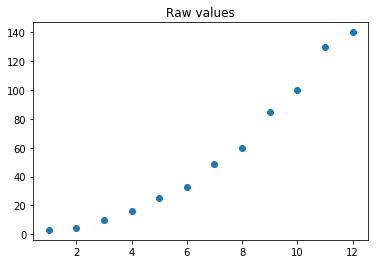

In [8]:
plt.scatter(outcome,feature)
plt.title('Raw values')
plt.show()

In [9]:
#create a feature using a non-linear transformation
sqrt_feature=[math.sqrt(x) for x in feature]
print(sqrt_feature)

[1.7320508075688772, 2.0, 3.1622776601683795, 4.0, 5.0, 5.744562646538029, 7.0, 7.745966692414834, 9.219544457292887, 10.0, 11.40175425099138, 11.832159566199232]


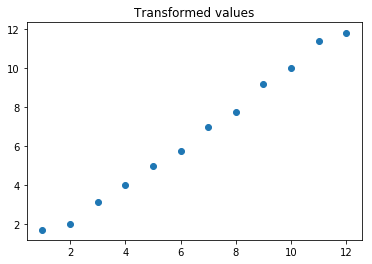

In [10]:
plt.scatter(outcome,sqrt_feature)
plt.title('Transformed values')
plt.show()

### Assumption 2: Multivariate Normality

In [11]:
#Extract predicted values.
predicted=regr.predict(X).ravel()
actual=data['Sales']

In [12]:
#Calculate the error (residual)
residual=actual-predicted

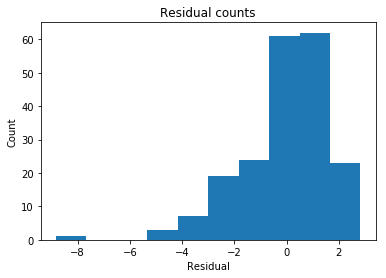

In [13]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption 3: Homoscedasiticity

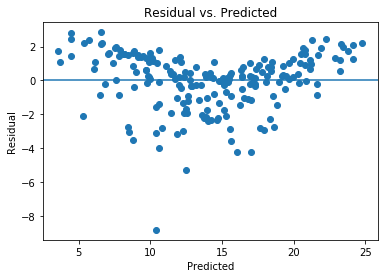

In [14]:
plt.scatter(predicted,residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#### Assumption 4: Low Multicollinearity

In [15]:
correlation_matrix=X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


Drill: fixing assumptions
<br>Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

In [16]:
residual.describe()

count   200.000
mean      0.000
std       1.673
min      -8.828
25%      -0.891
50%       0.242
75%       1.189
max       2.829
Name: Sales, dtype: float64

In [17]:
data['Residual']=residual
data['Predicted']=predicted

In [18]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Residual,Predicted
0,1,230.100,37.800,69.200,22.100,1.576,20.524
1,2,44.500,39.300,45.100,10.400,-1.938,12.338
2,3,17.200,45.900,69.300,9.300,-3.008,12.308
3,4,151.500,41.300,58.500,18.500,0.902,17.598
4,5,180.800,10.800,58.400,12.900,-0.289,13.189


In [19]:
print(residual)

0      1.576
1     -1.938
2     -3.008
3      0.902
4     -0.289
5     -5.278
6      0.070
7      1.077
8      1.073
9     -1.951
10     1.568
11     0.115
12    -1.377
13     0.874
14     0.566
15     1.581
16    -0.324
17     1.175
18     1.348
19     0.434
20    -0.101
21    -2.241
22    -0.889
23    -1.046
24     1.553
25    -3.610
26     0.010
27    -1.152
28    -0.511
29     1.356
       ...  
170    1.005
171    0.142
172   -0.008
173   -0.271
174   -2.244
175    2.213
176    0.221
177   -0.462
178   -4.211
179    0.215
180   -0.087
181   -1.728
182    2.145
183    2.067
184   -0.939
185    1.797
186    0.609
187    0.224
188   -2.744
189    0.648
190   -1.689
191    1.476
192    1.434
193    1.113
194    0.805
195    2.230
196    1.535
197    0.014
198    1.733
199   -1.773
Name: Sales, Length: 200, dtype: float64


In [20]:
data.shape

(200, 7)

In [21]:
st3=0.5*data.Residual.std()
df=data.drop(data[(data.Residual>st3)|(data.Residual<-st3)].index)

In [22]:
df.shape

(79, 7)

(array([ 2.,  2.,  3., 12.,  9., 11., 16.,  9., 10.,  5.]),
 array([-0.82184212, -0.65648737, -0.49113262, -0.32577786, -0.16042311,
         0.00493164,  0.17028639,  0.33564114,  0.50099589,  0.66635065,
         0.8317054 ]),
 <a list of 10 Patch objects>)

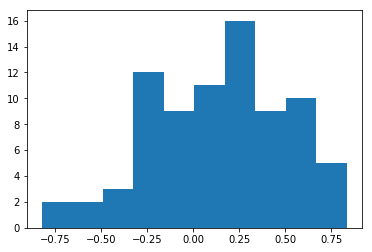

In [23]:
plt.hist(df.Residual)

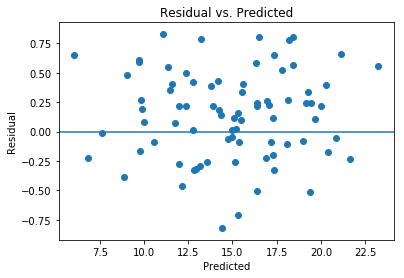

In [24]:
plt.scatter(df['Predicted'],df['Residual'])
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()